<a href="https://www.kaggle.com/code/sonawanelalitsunil/airline-fight-routes-in-the-us-1993-2024-ml-82?scriptVersionId=203885849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family: 'Amiri'; font-size: 3rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ༘ ೀ⋆｡ ˚ Airline Fight Routes in The US [1993-2024]|ML|  ˚ ༘ ೀ⋆｡ ˚</p>

# Description:
This dataset provides comprehensive information on airline flight routes within the United States from 1993 to 2024. It includes details such as flight numbers, departure and arrival airports, distances, and flight frequencies. This data can be utilized for various analyses, including understanding trends in air travel, route optimization, and exploring the evolution of airline networks over time.

# Key Features:

* Flight number
* Departure and arrival airports
* Distance of flights
* Flight frequency and trends
# Use Cases:

Analyze changes in airline routes over the decades
Study the impact of regulations and events on flight patterns
Develop predictive models for airline operations and demand forecasting

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-airline-fight-routes-in-the-us/Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv


#  <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ 1|| Import Dependencies  ˚ ೀ⋆｡ ˚</p>

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import geopy.distance as geodist

import warnings
warnings.filterwarnings("ignore")

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ About Data  ˚ ೀ⋆｡ ˚</p>

- Dataset Link: [Airline Fight Routes in The US [1993-2024]|ML|](/kaggle/input/all-airline-fight-routes-in-the-us/Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv)

- problem : this problem consider as Analysis problem
1. Solving Techniques : By using ordinary Statistical pkgs
1. we will Make Some Analysis by using both pandas and sql , DataExplantory , Data cleaning , data processing ,

1. data visualization , split and preparing data to bulding models .

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ About Data  ˚ ೀ⋆｡ ˚</p>

1.  problem : this problem consider as Analysis problem
1.  Solving Techniques : By using ordinary Statistical pkgs
1.  we will Make Some Analysis by using both pandas and sql , DataExplantory , Data cleaning , data processing ,

1.  data visualization , split and preparing data to bulding models .

In [3]:
df = pd.read_csv("/kaggle/input/all-airline-fight-routes-in-the-us/Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [5]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [6]:
df.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [7]:
df.dtypes

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object

In [8]:
df.isna().mean()

tbl               0.000000
Year              0.000000
quarter           0.000000
citymarketid_1    0.000000
citymarketid_2    0.000000
city1             0.000000
city2             0.000000
airportid_1       0.000000
airportid_2       0.000000
airport_1         0.000000
airport_2         0.000000
nsmiles           0.000000
passengers        0.000000
fare              0.000000
carrier_lg        0.006261
large_ms          0.006261
fare_lg           0.006261
carrier_low       0.006554
lf_ms             0.006554
fare_low          0.006554
Geocoded_City1    0.159403
Geocoded_City2    0.159403
tbl1apk           0.000000
dtype: float64

In [9]:
print({col: df[col].value_counts() for col in df.columns})

{'tbl': tbl
Table 1a    200897
Table1a      45058
Name: count, dtype: int64, 'Year': Year
1993    9739
1996    9081
1997    8949
1999    8757
1998    8708
2001    8648
2002    8589
2000    8541
2003    8488
2004    8466
2005    8365
2013    8301
2012    8238
2017    8232
2014    8229
2016    8227
2006    8200
2018    8195
2015    8150
2019    8148
2011    8144
2010    8113
2009    8109
2008    8107
2007    7997
2022    7809
2023    7788
2021    7758
2020    7520
1994    2454
2024    1905
Name: count, dtype: int64, 'quarter': quarter
1    63894
3    61204
2    60587
4    60270
Name: count, dtype: int64, 'citymarketid_1': citymarketid_1
32575    26055
30721    23433
31703    23175
30977    18430
30194    14905
         ...  
31775        2
32223        2
31719        1
30676        1
30685        1
Name: count, Length: 141, dtype: int64, 'citymarketid_2': citymarketid_2
31703    36913
30852    31623
32457    22096
32575    21475
33195     9267
         ...  
33502        2
35628        2

In [10]:
# Remove % and _ from column names
df.columns = df.columns.str.replace('[%_]', '', regex=True)
df

,tbl,Year,quarter,citymarketid1,citymarketid2,city1,city2,airportid1,airportid2,airport1,...,fare,carrierlg,largems,farelg,carrierlow,lfms,farelow,GeocodedCity1,GeocodedCity2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [11]:
# clean the columns of the dataset from precentage sign % or _ if found  :
# Remove special characters from column names
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
df

,tbl,Year,quarter,citymarketid1,citymarketid2,city1,city2,airportid1,airportid2,airport1,...,fare,carrierlg,largems,farelg,carrierlow,lfms,farelow,GeocodedCity1,GeocodedCity2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [12]:
from sklearn.impute import SimpleImputer
# Initialize the imputer with the most frequent strategy
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Apply the imputer to all categorical columns at once
df[df.select_dtypes("object").columns] = imputer.fit_transform(df.select_dtypes("object"))

In [13]:
# Initialize the imputer with the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [14]:
# Apply the imputer to all numerical columns at once
df[df.select_dtypes("number").columns] = imputer.fit_transform(df.select_dtypes("number"))
df

,tbl,Year,quarter,citymarketid1,citymarketid2,city1,city2,airportid1,airportid2,airport1,...,fare,carrierlg,largems,farelg,carrierlow,lfms,farelow,GeocodedCity1,GeocodedCity2,tbl1apk
0,Table1a,2021.0,3.0,30135.0,33195.0,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135.0,14112.0,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131013514112ABEPIE
1,Table1a,2021.0,3.0,30135.0,33195.0,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135.0,15304.0,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131013515304ABETPA
2,Table1a,2021.0,3.0,30140.0,30194.0,"Albuquerque, NM","Dallas/Fort Worth, TX",10140.0,11259.0,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131014011259ABQDAL
3,Table1a,2021.0,3.0,30140.0,30194.0,"Albuquerque, NM","Dallas/Fort Worth, TX",10140.0,11298.0,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131014011298ABQDFW
4,Table1a,2021.0,3.0,30140.0,30466.0,"Albuquerque, NM","Phoenix, AZ",10140.0,14107.0,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024.0,1.0,35412.0,31703.0,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412.0,12953.0,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541212953TYSLGA
245951,Table1a,2024.0,1.0,35412.0,32467.0,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412.0,11697.0,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541211697TYSFLL
245952,Table1a,2024.0,1.0,35412.0,32467.0,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412.0,13303.0,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541213303TYSMIA
245953,Table1a,2024.0,1.0,35412.0,33195.0,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412.0,14112.0,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541214112TYSPIE


In [15]:
df.isna().sum()

tbl              0
Year             0
quarter          0
citymarketid1    0
citymarketid2    0
city1            0
city2            0
airportid1       0
airportid2       0
airport1         0
airport2         0
nsmiles          0
passengers       0
fare             0
carrierlg        0
largems          0
farelg           0
carrierlow       0
lfms             0
farelow          0
GeocodedCity1    0
GeocodedCity2    0
tbl1apk          0
dtype: int64

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ Data Exploratory ˚ ೀ⋆｡ ˚</p>

In [16]:
# Extract and display types of columns
obj_cols = df.select_dtypes("object").columns
num_cols = df.select_dtypes("number").columns
disc_cols = df.select_dtypes("int64").columns
conts_cols = df.select_dtypes("float64").columns
nominal_cols = df.columns[df.nunique() < 3]

# Print results in one line each
print("Object columns:", obj_cols)
print("Numerical columns:", num_cols)
print("Discrete columns:", disc_cols)
print("Continuous columns:", conts_cols)
print("Nominal columns:", nominal_cols)

Object columns: Index(['tbl', 'city1', 'city2', 'airport1', 'airport2', 'carrierlg',
       'carrierlow', 'GeocodedCity1', 'GeocodedCity2', 'tbl1apk'],
      dtype='object')
Numerical columns: Index(['Year', 'quarter', 'citymarketid1', 'citymarketid2', 'airportid1',
       'airportid2', 'nsmiles', 'passengers', 'fare', 'largems', 'farelg',
       'lfms', 'farelow'],
      dtype='object')
Discrete columns: Index([], dtype='object')
Continuous columns: Index(['Year', 'quarter', 'citymarketid1', 'citymarketid2', 'airportid1',
       'airportid2', 'nsmiles', 'passengers', 'fare', 'largems', 'farelg',
       'lfms', 'farelow'],
      dtype='object')
Nominal columns: Index(['tbl'], dtype='object')


In [17]:
df.select_dtypes("object").describe().T

,count,unique,top,freq
tbl,245955,2,Table 1a,200897
city1,245955,141,"Los Angeles, CA (Metropolitan Area)",26055
city2,245955,128,"New York City, NY (Metropolitan Area)",36913
airport1,245955,187,ORD,8819
airport2,245955,173,DCA,10268
carrierlg,245955,67,WN,60539
carrierlow,245955,71,WN,57639
GeocodedCity1,245955,238,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",60234
GeocodedCity2,245955,207,"New York City, NY (Metropolitan Area)\n(40.123...",69894
tbl1apk,245955,245955,202131013514112ABEPIE,1


# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ SQL Analysis  ˚ ೀ⋆｡ ˚</p>

In [18]:
import sqlite3

In [19]:
# Connect to the database
conn = sqlite3.connect('Air.db')

# Create a cursor object
cursor = conn.cursor()

# Check if the table 'Air' exists
cursor.execute("""
SELECT * FROM sqlite_master WHERE type='table' AND name='Air1';
""")
table_exists = cursor.fetchone()

# Create the table only if it does not exist
if not table_exists:
    # Assuming 'data' is your pandas DataFrame
    df.to_sql("Air1", conn, if_exists='fail')  # 'fail' will raise a ValueError if the table already exists
else:
    print("The table 'Air1' already exists. Skipping table creation.")

In [20]:
df= pd.read_sql("SELECT * FROM Air1", conn)
df

,index,tbl,Year,quarter,citymarketid1,citymarketid2,city1,city2,airportid1,airportid2,...,fare,carrierlg,largems,farelg,carrierlow,lfms,farelow,GeocodedCity1,GeocodedCity2,tbl1apk
0,0,Table1a,2021.0,3.0,30135.0,33195.0,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135.0,14112.0,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131013514112ABEPIE
1,1,Table1a,2021.0,3.0,30135.0,33195.0,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135.0,15304.0,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131013515304ABETPA
2,2,Table1a,2021.0,3.0,30140.0,30194.0,"Albuquerque, NM","Dallas/Fort Worth, TX",10140.0,11259.0,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131014011259ABQDAL
3,3,Table1a,2021.0,3.0,30140.0,30194.0,"Albuquerque, NM","Dallas/Fort Worth, TX",10140.0,11298.0,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131014011298ABQDFW
4,4,Table1a,2021.0,3.0,30140.0,30466.0,"Albuquerque, NM","Phoenix, AZ",10140.0,14107.0,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,245950,Table1a,2024.0,1.0,35412.0,31703.0,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412.0,12953.0,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541212953TYSLGA
245951,245951,Table1a,2024.0,1.0,35412.0,32467.0,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412.0,11697.0,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541211697TYSFLL
245952,245952,Table1a,2024.0,1.0,35412.0,32467.0,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412.0,13303.0,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541213303TYSMIA
245953,245953,Table1a,2024.0,1.0,35412.0,33195.0,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412.0,14112.0,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",202411541214112TYSPIE


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          245955 non-null  int64  
 1   tbl            245955 non-null  object 
 2   Year           245955 non-null  float64
 3   quarter        245955 non-null  float64
 4   citymarketid1  245955 non-null  float64
 5   citymarketid2  245955 non-null  float64
 6   city1          245955 non-null  object 
 7   city2          245955 non-null  object 
 8   airportid1     245955 non-null  float64
 9   airportid2     245955 non-null  float64
 10  airport1       245955 non-null  object 
 11  airport2       245955 non-null  object 
 12  nsmiles        245955 non-null  float64
 13  passengers     245955 non-null  float64
 14  fare           245955 non-null  float64
 15  carrierlg      245955 non-null  object 
 16  largems        245955 non-null  float64
 17  farelg         245955 non-nul

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,245955.0,122977.000000,71001.237067,0.0000,61488.5000,122977.0000,184465.500,245954.0
Year,245955.0,2008.524124,8.703364,1993.0000,2001.0000,2008.0000,2016.000,2024.0
quarter,245955.0,2.479153,1.122149,1.0000,1.0000,2.0000,3.000,4.0
citymarketid1,245955.0,31556.430201,1089.872880,30135.0000,30721.0000,31423.0000,32467.000,35412.0
citymarketid2,245955.0,32180.117086,1232.464184,30189.0000,30994.0000,32211.0000,33192.000,35628.0
airportid1,245955.0,12437.099986,1431.665257,10135.0000,11193.0000,12266.0000,13487.000,16440.0
airportid2,245955.0,13249.889525,1425.810159,10466.0000,12197.0000,13303.0000,14679.000,15919.0
nsmiles,245955.0,1189.812319,703.143472,109.0000,626.0000,1023.0000,1736.000,2724.0
passengers,245955.0,299.476795,511.389486,0.0000,21.0000,113.0000,339.000,8301.0
fare,245955.0,218.979587,82.372486,50.0000,164.6200,209.3200,262.890,3377.0


In [23]:
# check null_values :
df.isna().sum()

index            0
tbl              0
Year             0
quarter          0
citymarketid1    0
citymarketid2    0
city1            0
city2            0
airportid1       0
airportid2       0
airport1         0
airport2         0
nsmiles          0
passengers       0
fare             0
carrierlg        0
largems          0
farelg           0
carrierlow       0
lfms             0
farelow          0
GeocodedCity1    0
GeocodedCity2    0
tbl1apk          0
dtype: int64

In [24]:
print(df.columns)

Index(['index', 'tbl', 'Year', 'quarter', 'citymarketid1', 'citymarketid2',
       'city1', 'city2', 'airportid1', 'airportid2', 'airport1', 'airport2',
       'nsmiles', 'passengers', 'fare', 'carrierlg', 'largems', 'farelg',
       'carrierlow', 'lfms', 'farelow', 'GeocodedCity1', 'GeocodedCity2',
       'tbl1apk'],
      dtype='object')


In [25]:
# Get the column names from the AIR1 table
cursor.execute("PRAGMA table_info(AIR1);")
columns = cursor.fetchall()

# Print column names
print("Columns in AIR1:", [column[1] for column in columns])  # column[1] contains the column name


Columns in AIR1: ['index', 'tbl', 'Year', 'quarter', 'citymarketid1', 'citymarketid2', 'city1', 'city2', 'airportid1', 'airportid2', 'airport1', 'airport2', 'nsmiles', 'passengers', 'fare', 'carrierlg', 'largems', 'farelg', 'carrierlow', 'lfms', 'farelow', 'GeocodedCity1', 'GeocodedCity2', 'tbl1apk']


In [26]:
R1=cursor.execute("SELECT COUNT(airport1) FROM AIR1 WHERE  airport1='ABQ' AND carrierlow='UA'")
print("Number of airport1 whose UA =",R1.fetchall())
R2=cursor.execute("SELECT COUNT(airport1) FROM AIR1  WHERE airport1='ABE' AND farelow > 81")
print("Number of airport1 whose fare_lg > 81",R2.fetchall())

Number of airport1 whose UA = [(228,)]
Number of airport1 whose fare_lg > 81 [(66,)]


In [27]:
# Q2: Select the Minimum & Maximum of fare_low where airport='ABQ'
R3 = cursor.execute("SELECT MIN(farelow), MAX(farelow) FROM AIR1 WHERE airport1='ABQ'")
print("The minimum & Maximum of farelow where airport1='ABQ':", R3.fetchall())

The minimum & Maximum of farelow where airport1='ABQ': [(65.3, 1199.5)]


In [28]:
R4 = cursor.execute("SELECT MIN(Farelow), MAX(farelow) FROM AIR1 WHERE airport1='ABQ'")
print("The minimum & Maximum of farelow where airport1='ABQ':", R4.fetchall())

The minimum & Maximum of farelow where airport1='ABQ': [(65.3, 1199.5)]


In [29]:
R5=cursor.execute("SELECT COUNT(QUARTER) FROM AIR1 WHERE  citymarketid1='30140.0'")
print("Number of  QUARTER that citymarketid1=30140 :",R5.fetchall())

Number of  QUARTER that citymarketid1=30140 : [(3197,)]


In [30]:
!pip install pywaffle 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 61.0 MB/s eta 0:00:00


In [31]:
!pip install waffle

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.2 MB/s eta 0:00:00
  Created wheel for waffle: filename=waffle-0.5.0-py3-none-any.whl size=16512 sha256=a32557a894f69b9986eb5a51ae488f909d102e061ee2eae5ac4257836b572462
  Stored in directory: /root/.cache/pip/wheels/49/81/51/88aedf28aaf857bf03efcb70a30fbcf2140032ace1f83e3514
Successfully built waffle


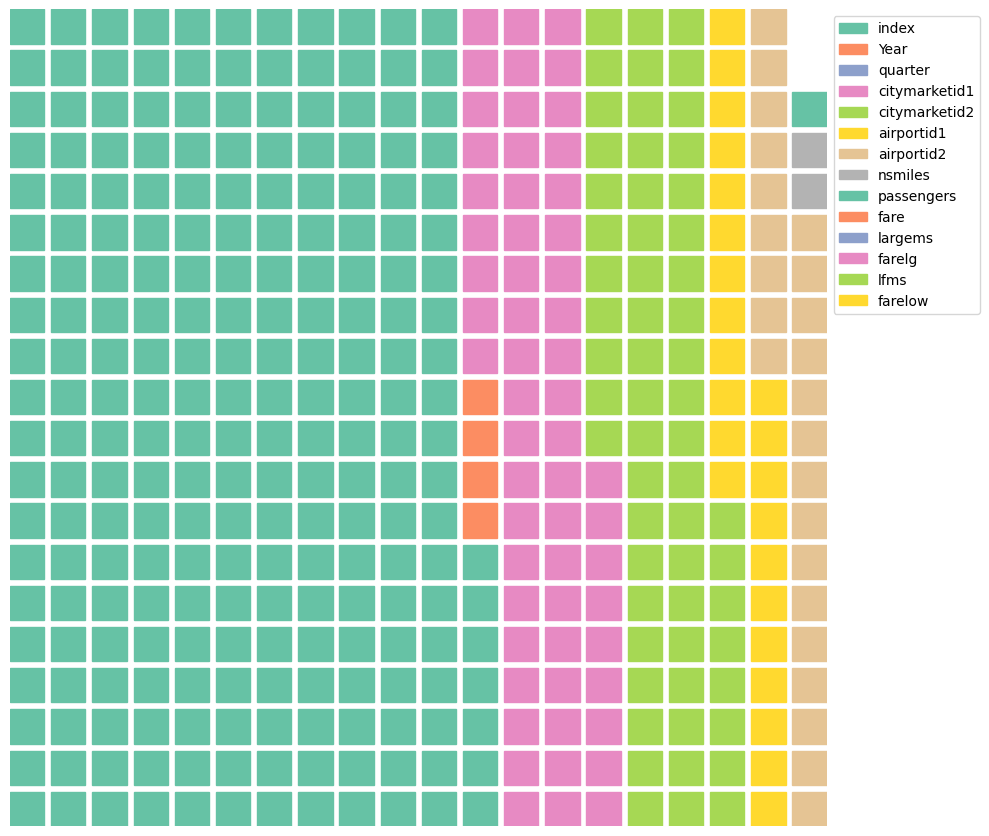

In [32]:
from pywaffle import Waffle

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
values = df[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=20,
    columns=20,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(10, 15)
)
plt.show()

In [33]:
import folium

# Create a map object
map = folium.Map(location=[27.9506,-82.4584], zoom_start=10)

# Define the locations
locations = [
    {"location": [27.9506, -82.4584], "popup": "Tampa, FL (Metropolitan Area)"},
    {"location": [35.9606, -83.9207], "popup": "Knoxville"},
    {"location": [35.0844, -106.6476], "popup": "Albuquerque"}
]

# Add markers to the map
for loc in locations:
    folium.Marker(location=loc["location"], popup=loc["popup"]).add_to(map)

# Display the map
map

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'quarter'}>,
        <Axes: title={'center': 'citymarketid1'}>],
       [<Axes: title={'center': 'citymarketid2'}>,
        <Axes: title={'center': 'airportid1'}>,
        <Axes: title={'center': 'airportid2'}>,
        <Axes: title={'center': 'nsmiles'}>],
       [<Axes: title={'center': 'passengers'}>,
        <Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'largems'}>,
        <Axes: title={'center': 'farelg'}>],
       [<Axes: title={'center': 'lfms'}>,
        <Axes: title={'center': 'farelow'}>, <Axes: >, <Axes: >]],
      dtype=object)

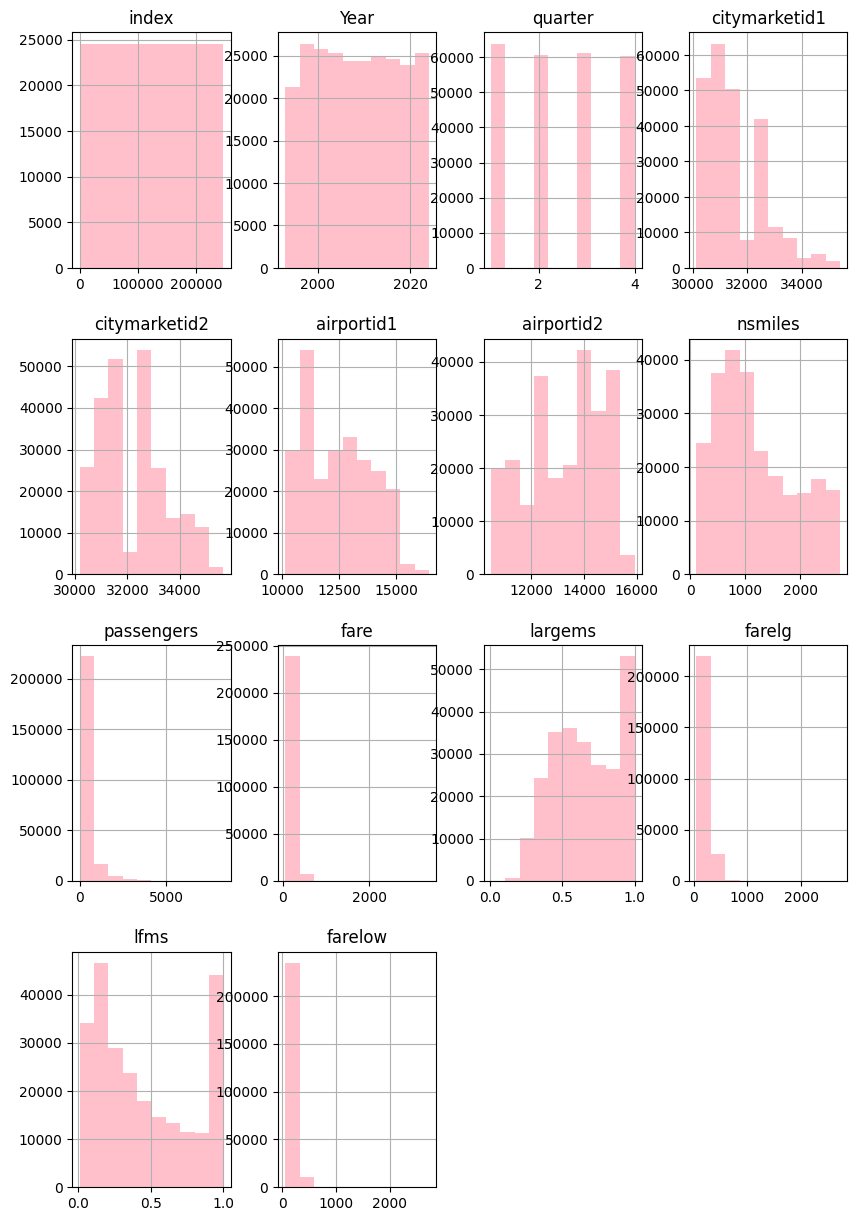

In [34]:
# plot the histgram:
df.hist(figsize=(10,15),color="pink")

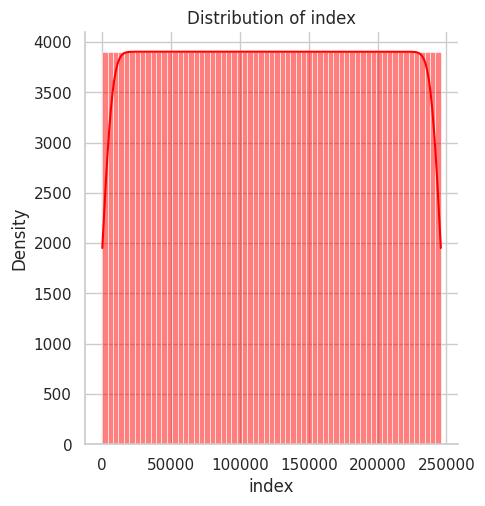

In [35]:
import seaborn as sns
# Set Seaborn style
sns.set(style="whitegrid", palette="coolwarm")

# Create distribution plots for each integer column
for col in df.select_dtypes(include="int64").columns:
    sns.displot(df[col], kde=True, color="r")  # Distribution plot with KDE
    plt.title(f"Distribution of {col}")  # Title
    plt.xlabel(col)  # X-axis label
    plt.ylabel("Density")  # Y-axis label
    plt.show()  # Display the plot

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# selecting numerical features :
numerical_features = df.select_dtypes(include=['number'])
scaler = StandardScaler()
# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)
scaled_numerical_df

,index,Year,quarter,citymarketid1,citymarketid2,airportid1,airportid2,nsmiles,passengers,fare,largems,farelg,lfms,farelow
0,-1.732044,1.433457,0.464153,-1.304219,0.823460,-1.607991,0.604647,-0.312614,-0.233632,-1.669852,1.495225,-1.625511,1.658809,-1.488780
1,-1.732030,1.433457,0.464153,-1.304219,0.823460,-1.607991,1.440665,-0.312614,-0.548461,-0.122002,-0.889873,0.015826,-0.996647,-0.497775
2,-1.732016,1.433457,0.464153,-1.299631,-1.611504,-1.604498,-1.396324,-0.867268,-0.186701,-0.417854,1.480935,-0.405200,1.649161,-0.084220
3,-1.732002,1.433457,0.464153,-1.299631,-1.611504,-1.604498,-1.368972,-0.867268,-0.069373,-0.441163,1.394301,-0.421193,1.590667,-0.102627
4,-1.731987,1.433457,0.464153,-1.299631,-1.390808,-1.604498,0.601140,-1.225659,0.192658,-0.508297,-0.263790,-0.404607,-0.168683,-0.338789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,1.731987,1.778152,-1.318145,3.537640,-0.387125,2.077934,-0.208226,-0.746382,-0.180835,0.725006,0.380155,0.814993,-0.645079,0.788705
245951,1.732002,1.778152,-1.318145,3.537640,0.232772,2.077934,-1.089130,-0.662473,-0.043952,-0.853316,0.715971,-1.234339,1.132663,-1.038547
245952,1.732016,1.778152,-1.318145,3.537640,0.232772,2.077934,0.037249,-0.662473,-0.448733,1.350094,0.627551,1.223461,1.072963,1.790346
245953,1.732030,1.778152,-1.318145,3.537640,0.823460,2.077934,0.604647,-0.909933,-0.237543,-1.497221,1.495225,-1.457053,1.658809,-1.294888


In [38]:
from sklearn.feature_selection import VarianceThreshold 


In [39]:
# Initialize the VarianceThreshold selector
selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the numerical features
selector.fit(df.select_dtypes(include='number'))

# Get the boolean mask of features selected (True means feature is retained)
selected_features_mask = selector.get_support()

# Get the selected feature names
selected_feature_names = df.select_dtypes(include='number').columns[selected_features_mask]

print("Selected Features:", selected_feature_names.tolist())  

Selected Features: ['index', 'Year', 'quarter', 'citymarketid1', 'citymarketid2', 'airportid1', 'airportid2', 'nsmiles', 'passengers', 'fare', 'largems', 'farelg', 'lfms', 'farelow']


In [40]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold

class Var_Selector(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.num_cols = None

    def fit(self, data, y=None):
        # Store the names of numeric columns
        self.num_cols = data.select_dtypes(include='number').columns
        return self

    def transform(self, data):
        # Apply VarianceThreshold
        selector = VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        # Get the selected feature names
        selected_features = self.num_cols[selector.get_support(indices=True)]
        
        # Identify removed columns
        removed_cols = [column for column in self.num_cols if column not in selected_features]
        
        # Drop columns with low variance
        data = data.drop(columns=removed_cols)

        # Remove high/low cardinality categorical columns
        cardinality_removed_cols = data.nunique()[(data.nunique() == 1) | (data.nunique() == len(data))].index
        return data.drop(columns=cardinality_removed_cols)

In [42]:
# Create an instance of Var_Selector
selector = Var_Selector()

# Fit the selector to the DataFrame
selector.fit(df)

# Transform the DataFrame
transformed_data = selector.transform(df)

print("Transformed Data:")
print(transformed_data)

Transformed Data:
            tbl    Year  quarter  citymarketid1  citymarketid2  \
0       Table1a  2021.0      3.0        30135.0        33195.0   
1       Table1a  2021.0      3.0        30135.0        33195.0   
2       Table1a  2021.0      3.0        30140.0        30194.0   
3       Table1a  2021.0      3.0        30140.0        30194.0   
4       Table1a  2021.0      3.0        30140.0        30466.0   
...         ...     ...      ...            ...            ...   
245950  Table1a  2024.0      1.0        35412.0        31703.0   
245951  Table1a  2024.0      1.0        35412.0        32467.0   
245952  Table1a  2024.0      1.0        35412.0        32467.0   
245953  Table1a  2024.0      1.0        35412.0        33195.0   
245954  Table1a  2024.0      1.0        35412.0        33195.0   

                                 city1                                  city2  \
0       Allentown/Bethlehem/Easton, PA          Tampa, FL (Metropolitan Area)   
1       Allentown/Bethlehem

In [43]:
# Check for duplicated rows in the DataFrame
duplicated_features = df.duplicated().sum()

# Print the number of duplicated rows
print("Number of duplicates: ", duplicated_features)

# Optional: Print the duplicated rows if you want to inspect them
if duplicated_features > 0:
    print("Duplicated Rows:")
    print(df[df.duplicated()])

Number of duplicates:  0


Correlation Matrix:
                  index      Year   quarter  citymarketid1  citymarketid2  \
index          1.000000  0.521614 -0.003872       0.008761      -0.002547   
Year           0.521614  1.000000  0.006125      -0.000373      -0.007119   
quarter       -0.003872  0.006125  1.000000       0.000384       0.003282   
citymarketid1  0.008761 -0.000373  0.000384       1.000000       0.007237   
citymarketid2 -0.002547 -0.007119  0.003282       0.007237       1.000000   
airportid1     0.006863 -0.009018  0.000650       0.526658       0.043398   
airportid2    -0.005298 -0.016622  0.000613       0.061771       0.537673   
nsmiles        0.004537  0.018843  0.000205       0.104284       0.091133   
passengers     0.040492  0.086214  0.016498      -0.043699      -0.090974   
fare           0.098587  0.151058 -0.026186       0.044420       0.014113   
largems        0.072523  0.105065 -0.000970      -0.118802      -0.024295   
farelg         0.098107  0.154486 -0.024448       0.0368

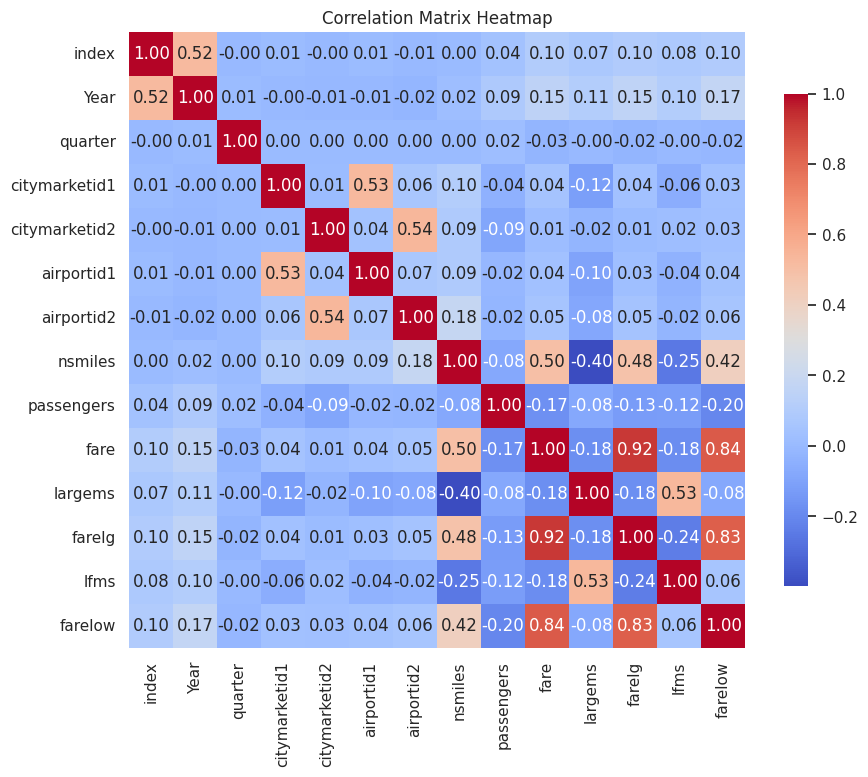

In [44]:
# Calculate the correlation matrix
corr = df.select_dtypes(include="number").corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix Heatmap")
plt.show()

Spearman Correlation Matrix:
                  index      Year   quarter  citymarketid1  citymarketid2  \
index          1.000000  0.521936 -0.003688       0.007090      -0.002314   
Year           0.521936  1.000000  0.005584      -0.006077      -0.005090   
quarter       -0.003688  0.005584  1.000000      -0.000597       0.002933   
citymarketid1  0.007090 -0.006077 -0.000597       1.000000       0.040872   
citymarketid2 -0.002314 -0.005090  0.002933       0.040872       1.000000   
airportid1     0.007077 -0.008429  0.000372       0.533276       0.034705   
airportid2    -0.004692 -0.015003  0.000532       0.101144       0.489562   
nsmiles        0.006788  0.023014 -0.000870       0.111127       0.114523   
passengers     0.035615  0.106509  0.022608      -0.071823      -0.106395   
fare           0.116220  0.193903 -0.022019       0.048845       0.010123   
largems        0.071463  0.102152 -0.001350      -0.115333      -0.034312   
farelg         0.112666  0.191471 -0.018921    

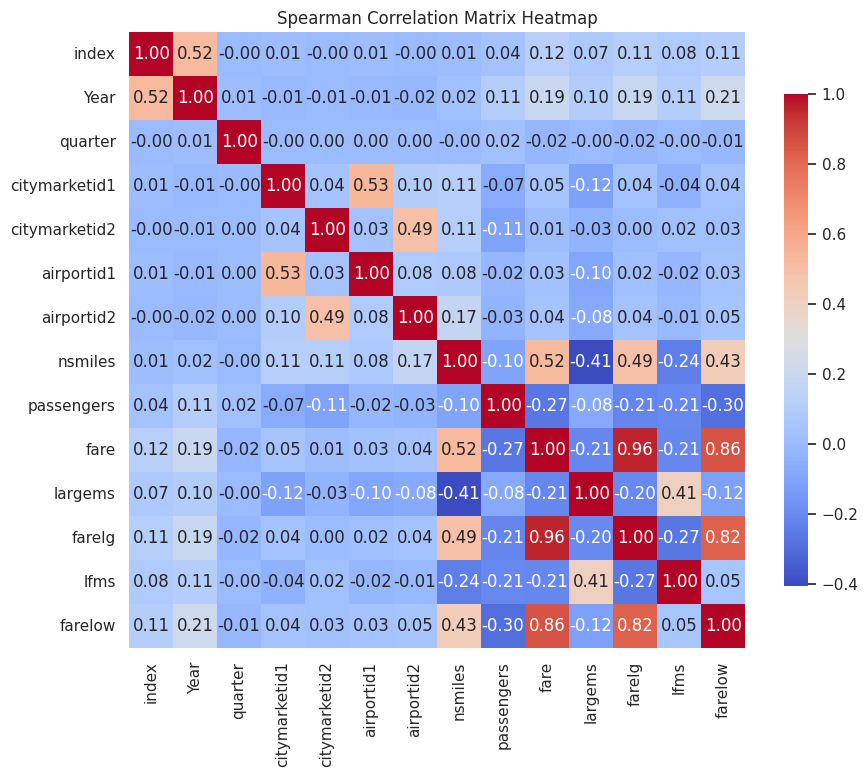

In [45]:
# Calculate the Spearman correlation matrix
sperman = df.select_dtypes(include="number").corr(method="spearman")

# Display the Spearman correlation matrix
print("Spearman Correlation Matrix:")
print(sperman)

# Optional: Visualize the Spearman correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sperman, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Spearman Correlation Matrix Heatmap")
plt.show()

Pearson Correlation Matrix:
                  index      Year   quarter  citymarketid1  citymarketid2  \
index          1.000000  0.521614 -0.003872       0.008761      -0.002547   
Year           0.521614  1.000000  0.006125      -0.000373      -0.007119   
quarter       -0.003872  0.006125  1.000000       0.000384       0.003282   
citymarketid1  0.008761 -0.000373  0.000384       1.000000       0.007237   
citymarketid2 -0.002547 -0.007119  0.003282       0.007237       1.000000   
airportid1     0.006863 -0.009018  0.000650       0.526658       0.043398   
airportid2    -0.005298 -0.016622  0.000613       0.061771       0.537673   
nsmiles        0.004537  0.018843  0.000205       0.104284       0.091133   
passengers     0.040492  0.086214  0.016498      -0.043699      -0.090974   
fare           0.098587  0.151058 -0.026186       0.044420       0.014113   
largems        0.072523  0.105065 -0.000970      -0.118802      -0.024295   
farelg         0.098107  0.154486 -0.024448     

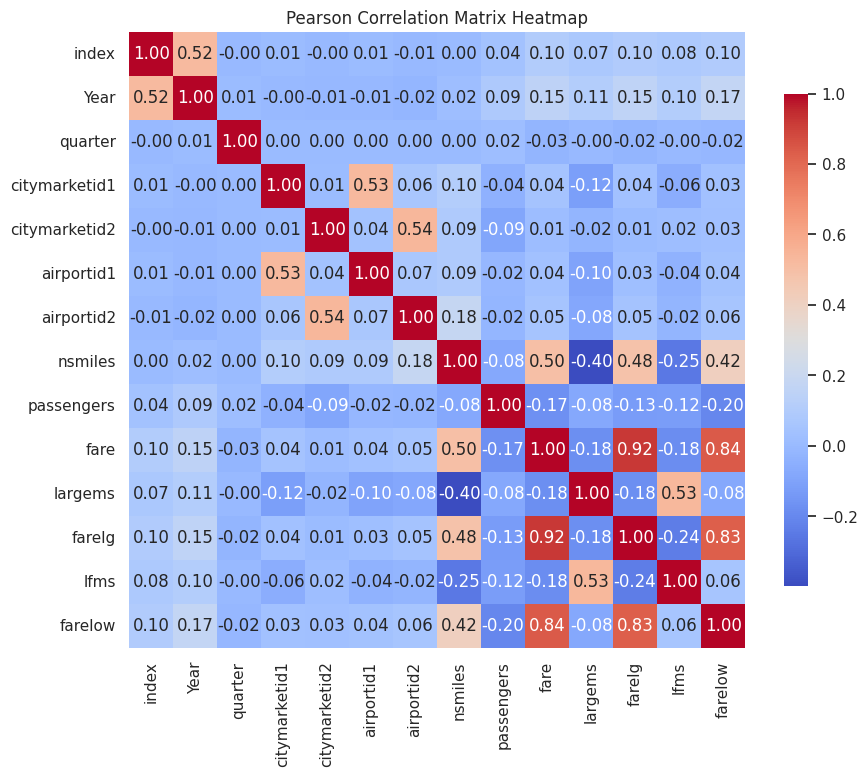

In [46]:
# Calculate the Pearson correlation matrix
pearson = df.select_dtypes(include="number").corr(method="pearson")

# Display the Pearson correlation matrix
print("Pearson Correlation Matrix:")
print(pearson)

# Optional: Visualize the Pearson correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()

Kendall Correlation Matrix:
                  index      Year   quarter  citymarketid1  citymarketid2  \
index          1.000000  0.409283 -0.001613       0.005140      -0.001567   
Year           0.409283  1.000000  0.004259      -0.004194      -0.003505   
quarter       -0.001613  0.004259  1.000000      -0.000458       0.002253   
citymarketid1  0.005140 -0.004194 -0.000458       1.000000       0.029586   
citymarketid2 -0.001567 -0.003505  0.002253       0.029586       1.000000   
airportid1     0.005154 -0.005740  0.000276       0.400776       0.026643   
airportid2    -0.003151 -0.010265  0.000400       0.070672       0.385932   
nsmiles        0.004527  0.015560 -0.000648       0.074477       0.080053   
passengers     0.023831  0.072376  0.016878      -0.048574      -0.072122   
fare           0.077297  0.136232 -0.016401       0.032901       0.007455   
largems        0.047971  0.069937 -0.001013      -0.078967      -0.024254   
farelg         0.075006  0.134387 -0.014088     

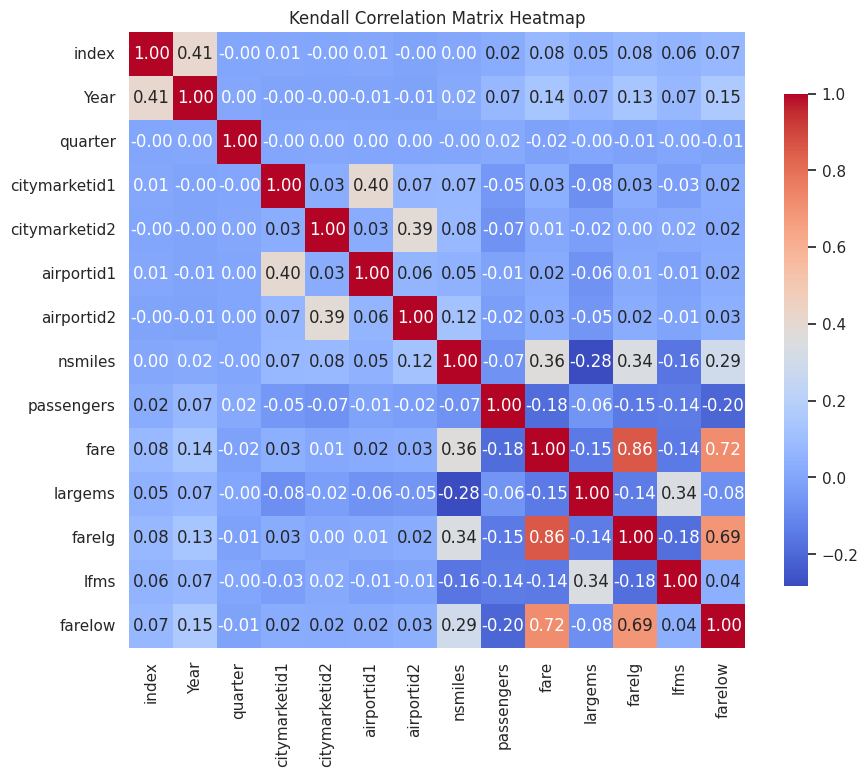

In [47]:
# Calculate the Kendall correlation matrix
kendall = df.select_dtypes(include="number").corr(method="kendall")

# Display the Kendall correlation matrix
print("Kendall Correlation Matrix:")
print(kendall)

# Optional: Visualize the Kendall correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kendall, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Kendall Correlation Matrix Heatmap")
plt.show()

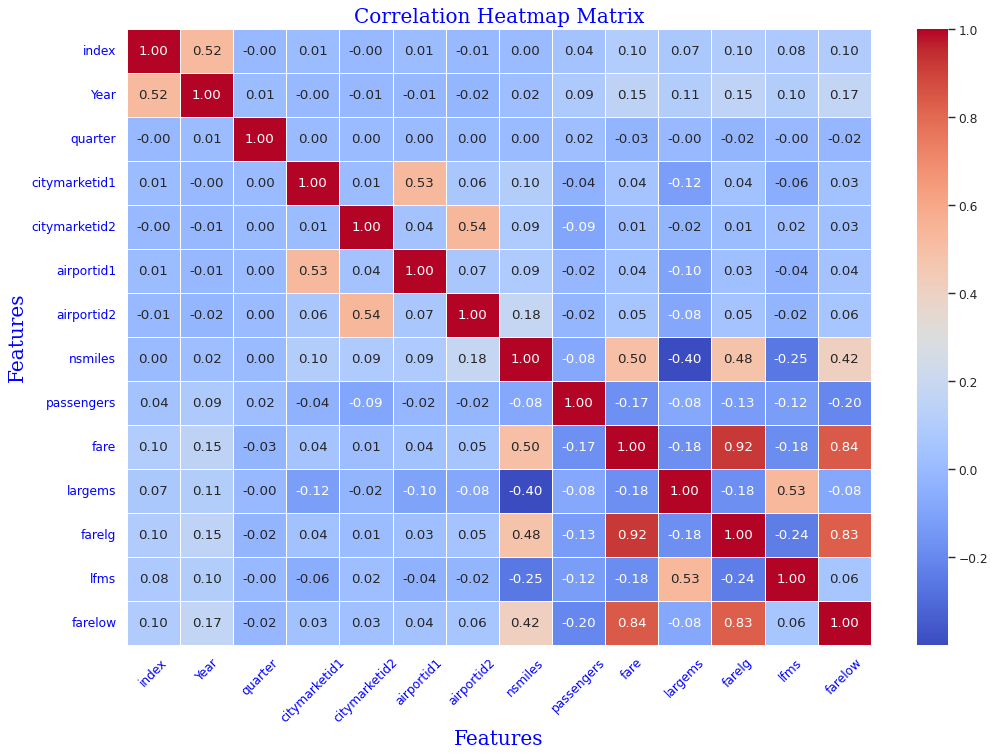

In [48]:
# Plot the heatmap of the correlation matrix
f1 = {"family": "serif", "size": 18, "color": "b"}
plt.figure(figsize=(15, 10), dpi=80)

# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include="number").corr()

# Create the heatmap with a different color palette
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Formatting the axes
plt.xticks(rotation=45, color="b")
plt.yticks(rotation=360, color="b")
plt.xlabel("Features", fontdict=f1)
plt.ylabel("Features", fontdict=f1)
plt.title("Correlation Heatmap Matrix", fontdict=f1)

# Show the plot
plt.show()

In [49]:
# Select numeric features
features = df.select_dtypes(include="number").columns

# Outlier detection
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < low_limit) | (df[col] > upper_limit)]
    
    # Print results
    if outliers.empty:
        print(f"No outliers in {col}.")
    else:
        print(f"Outliers detected in {col}: {outliers[col].values}")
    
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}, "
          f"Low Limit: {low_limit:.2f}, Upper Limit: {upper_limit:.2f}, "
          f"Number of Outliers: {len(outliers)}")
    print("-" * 30)

No outliers in index.
Q1: 61488.50, Q3: 184465.50, IQR: 122977.00, Low Limit: -122977.00, Upper Limit: 368931.00, Number of Outliers: 0
------------------------------
No outliers in Year.
Q1: 2001.00, Q3: 2016.00, IQR: 15.00, Low Limit: 1978.50, Upper Limit: 2038.50, Number of Outliers: 0
------------------------------
No outliers in quarter.
Q1: 1.00, Q3: 3.00, IQR: 2.00, Low Limit: -2.00, Upper Limit: 6.00, Number of Outliers: 0
------------------------------
Outliers detected in citymarketid1: [35096. 35096. 35412. ... 35412. 35412. 35412.]
Q1: 30721.00, Q3: 32467.00, IQR: 1746.00, Low Limit: 28102.00, Upper Limit: 35086.00, Number of Outliers: 1644
------------------------------
No outliers in citymarketid2.
Q1: 30994.00, Q3: 33192.00, IQR: 2198.00, Low Limit: 27697.00, Upper Limit: 36489.00, Number of Outliers: 0
------------------------------
No outliers in airportid1.
Q1: 11193.00, Q3: 13487.00, IQR: 2294.00, Low Limit: 7752.00, Upper Limit: 16928.00, Number of Outliers: 0
-----

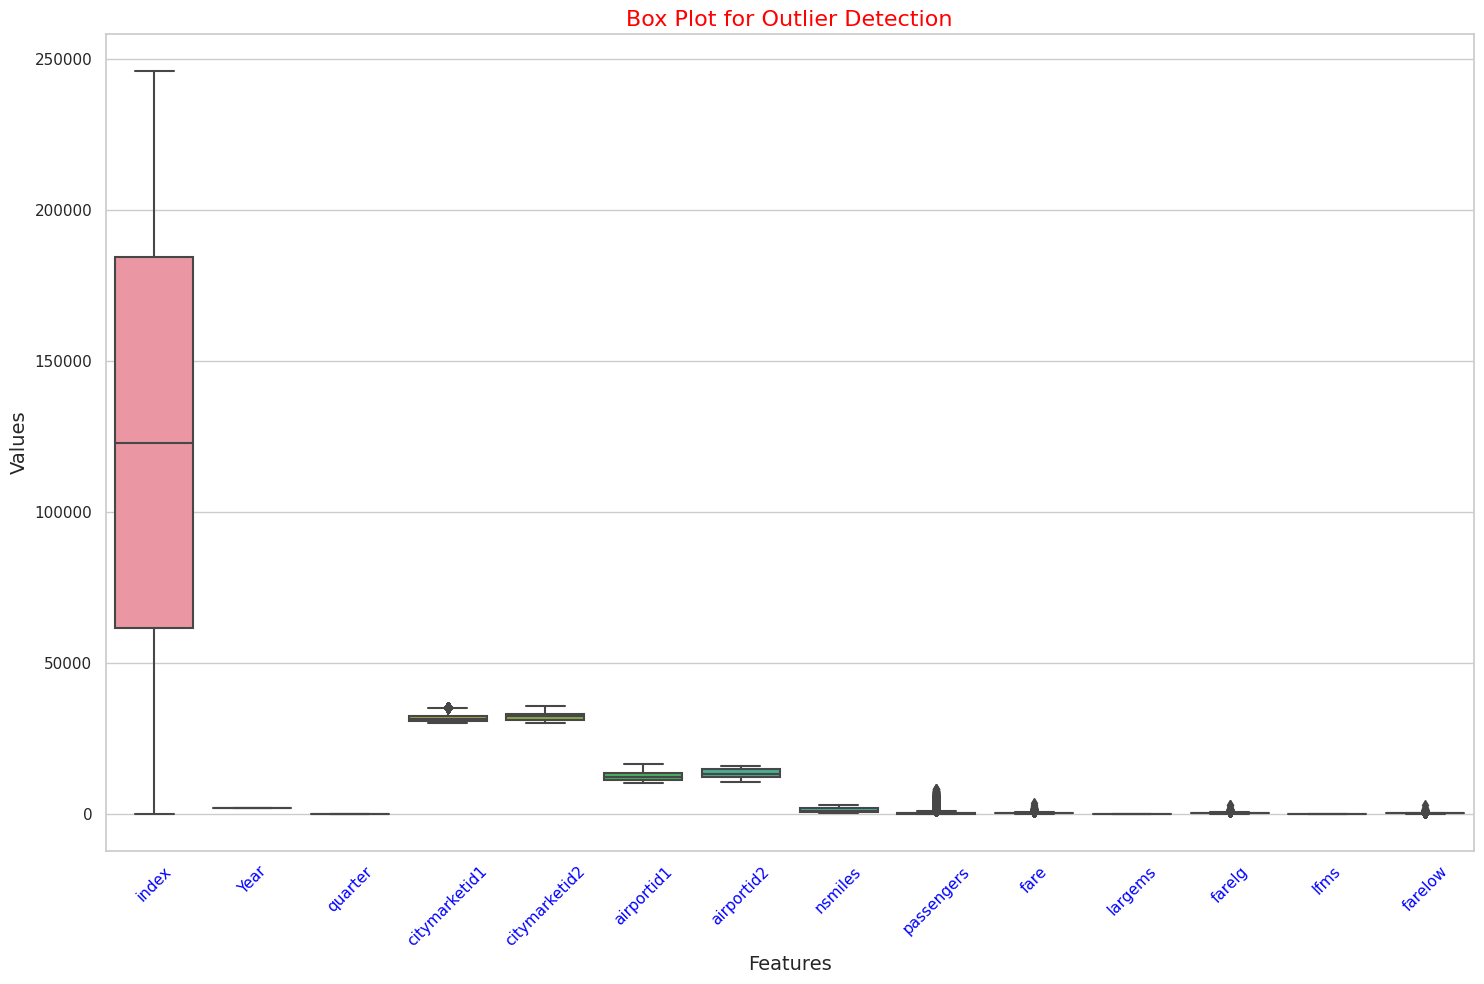

In [50]:
# Set up features and plot parameters
features = df.select_dtypes(include="number").columns
plt.figure(figsize=(15, 10), dpi=100)
plt.title("Box Plot for Outlier Detection", fontsize=16, color='r')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.xticks(rotation=45, color="b")

# Create box plot
sns.boxplot(data=df[features])

# Display the plot
plt.tight_layout()
plt.show()

Upper Limit: 1833.6452513850868
Lower Limit: -1234.691662313915


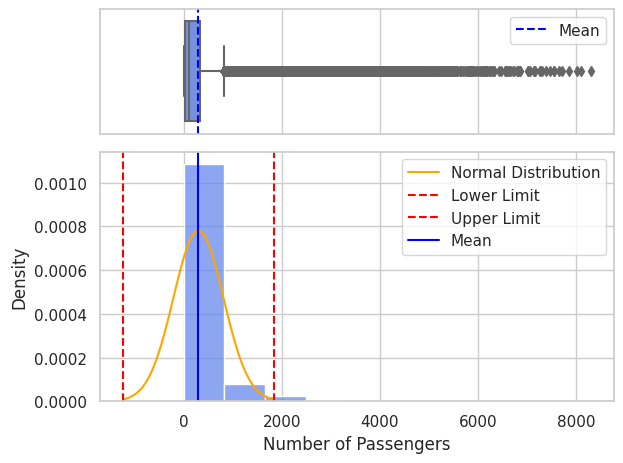

Mean Value: 299.4767945355858
Median Value: 113.0
1st Standard Deviation: 511.3894856165003


In [51]:
from scipy.stats import norm 
# Calculate statistics
mean = df.passengers.mean()
std = df.passengers.std()
median = df.passengers.median()
upper_limit = mean + std * 3
lower_limit = mean - std * 3

# Print calculated limits
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

# Create subplots
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 1)})

# Box plot
sns.boxplot(x=df["passengers"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--', label='Mean')

# Histogram with normal distribution overlay
sns.histplot(df["passengers"], ax=ax_hist, kde=False, stat='density', bins=10)
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
ax_hist.plot(x, norm.pdf(x, mean, std), color='orange', label='Normal Distribution')
ax_hist.axvline(lower_limit, color='r', linestyle='--', label='Lower Limit')
ax_hist.axvline(upper_limit, color='r', linestyle='--', label='Upper Limit')
ax_hist.axvline(mean, color='b', linestyle='-', label='Mean')

# Labels and legends
ax_box.set_xlabel('')
ax_hist.set_xlabel('Number of Passengers')
ax_hist.set_ylabel('Density')
ax_hist.legend()
ax_box.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("Mean Value:", mean)
print("Median Value:", median)
print("1st Standard Deviation:", std)

Upper Limit: 1833.6452513850868
Lower Limit: -1234.691662313915


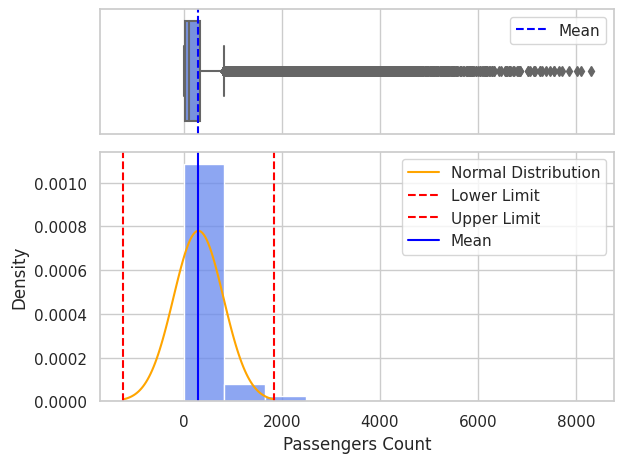

Mean Value: 299.4767945355858
Median Value: 113.0
1st Standard Deviation: 511.3894856165003


In [52]:
from scipy.stats import norm
# Calculate statistics
mean = df.passengers.mean()
std = df.passengers.std()
median = df.passengers.median()
upper_limit = mean + std * 3
lower_limit = mean - std * 3

print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

# Create subplots
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 1)})

# Box plot
sns.boxplot(x=df["passengers"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--', label='Mean')

# Histogram with normal distribution overlay
sns.histplot(df["passengers"], ax=ax_hist, kde=False, stat='density', bins=10)
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
ax_hist.plot(x, norm.pdf(x, mean, std), color='orange', label='Normal Distribution')
ax_hist.axvline(lower_limit, color='r', linestyle='--', label='Lower Limit')
ax_hist.axvline(upper_limit, color='r', linestyle='--', label='Upper Limit')
ax_hist.axvline(mean, color='b', linestyle='-', label='Mean')

# Labels and legends
ax_box.set_xlabel('')
ax_hist.set_xlabel('Passengers Count')
ax_hist.set_ylabel('Density')
ax_hist.legend()
ax_box.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("Mean Value:", mean)
print("Median Value:", median)
print("1st Standard Deviation:", std)

Upper Limit: 466.0970442280467
Lower Limit: -28.137870639382186


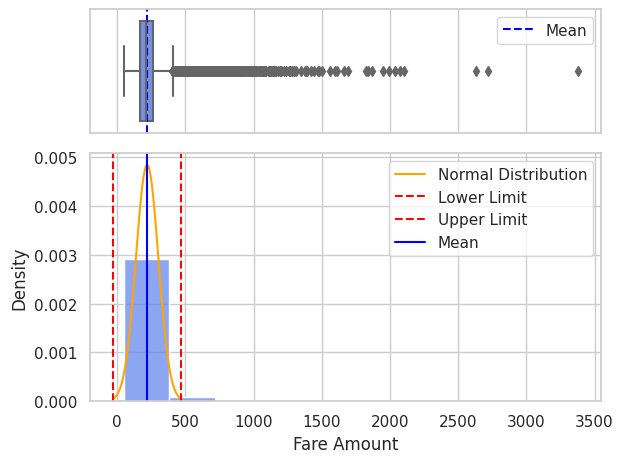

Mean Value: 218.97958679433225
Median Value: 209.32
1st Standard Deviation: 82.37248581123815


In [53]:
# Calculate statistics
mean = df.fare.mean()
std = df.fare.std()
median = df.fare.median()
upper_limit = mean + std * 3
lower_limit = mean - std * 3

# Print calculated limits
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

# Create subplots
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 1)})

# Box plot
sns.boxplot(x=df["fare"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--', label='Mean')

# Histogram with normal distribution overlay
sns.histplot(df["fare"], ax=ax_hist, kde=False, stat='density', bins=10)
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
ax_hist.plot(x, norm.pdf(x, mean, std), color='orange', label='Normal Distribution')
ax_hist.axvline(lower_limit, color='r', linestyle='--', label='Lower Limit')
ax_hist.axvline(upper_limit, color='r', linestyle='--', label='Upper Limit')
ax_hist.axvline(mean, color='b', linestyle='-', label='Mean')

# Labels and legends
ax_box.set_xlabel('')
ax_hist.set_xlabel('Fare Amount')
ax_hist.set_ylabel('Density')
ax_hist.legend()
ax_box.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("Mean Value:", mean)
print("Median Value:", median)
print("1st Standard Deviation:", std)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ The End ˚ ೀ⋆｡ ˚</p>